Github link: https://github.com/genom10/Sensors2023/tree/master/HW3

# Task 3.1

## Generate noisy 1D data

### Generate _true_ data

In [1]:
import numpy as np
from numpy.random import default_rng
from scipy.interpolate import CubicSpline

dots_number = 6
dots_range = 5

rng = default_rng()
x = np.linspace(0, (dots_number-1)*dots_range, num=dots_number)
y = rng.standard_normal(dots_number)*10
spl = CubicSpline(x, y)

### Let's see what we got

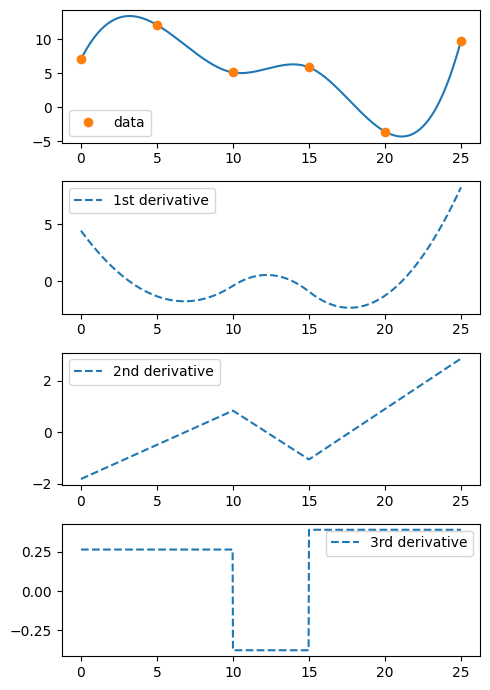

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 1, figsize=(5, 7))
xnew = np.linspace(0, (dots_number-1)*dots_range, num=1001)
ax[0].plot(xnew, spl(xnew))
ax[0].plot(x, y, 'o', label='data')
ax[1].plot(xnew, spl(xnew, nu=1), '--', label='1st derivative')
ax[2].plot(xnew, spl(xnew, nu=2), '--', label='2nd derivative')
ax[3].plot(xnew, spl(xnew, nu=3), '--', label='3rd derivative')
for j in range(4):
    ax[j].legend(loc='best')
plt.tight_layout()
plt.show()

### Now give it some normal noize

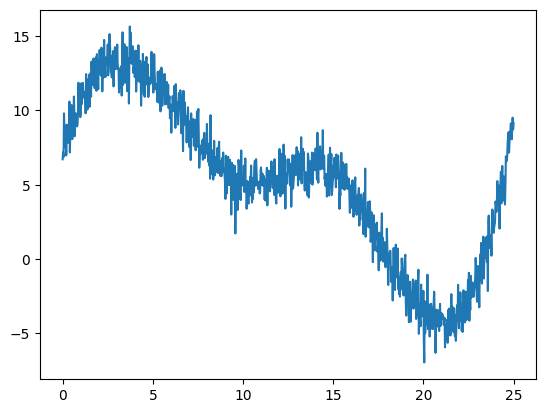

In [3]:
noize_sigma = 1

measurement = [value + rng.normal()*noize_sigma for value in spl(xnew)]
plt.plot(xnew, measurement)

## Compute Discrete Fourier Transform (DFT) for this dataset,

In [8]:
from scipy.fftpack import dct, idct
from scipy.fft import fft, ifft

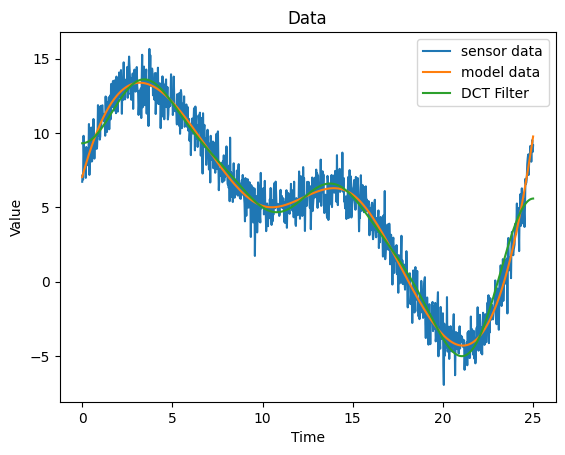

In [12]:
plt.ylabel('Value')
plt.xlabel('Time')
plt.title('Data')
plt.plot(xnew, measurement, label='sensor data')
plt.plot(xnew, spl(xnew), label='model data')



DCT = idct(dct(measurement, norm='ortho')[:10], n=len(xnew), norm='ortho')
plt.plot(xnew, DCT, label='DCT Filter')
plt.legend()
plt.show()

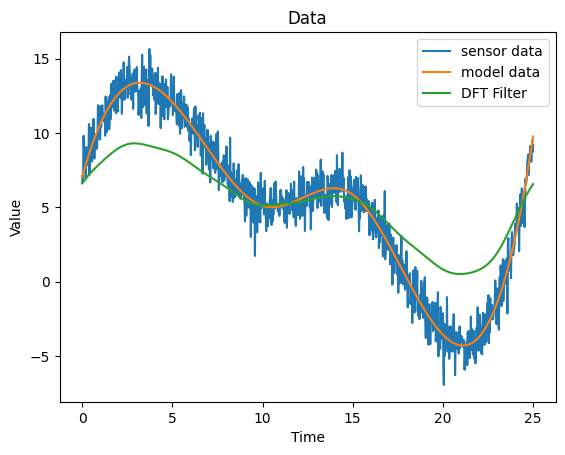

In [13]:
plt.ylabel('Value')
plt.xlabel('Time')
plt.title('Data')
plt.plot(xnew, measurement, label='sensor data')
plt.plot(xnew, spl(xnew), label='model data')



DFT = ifft(fft(measurement, norm='ortho')[:10], n=len(xnew), norm='ortho')
plt.plot(xnew, DFT, label='DFT Filter')
plt.legend()
plt.show()

## Compare

/home/genom10/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


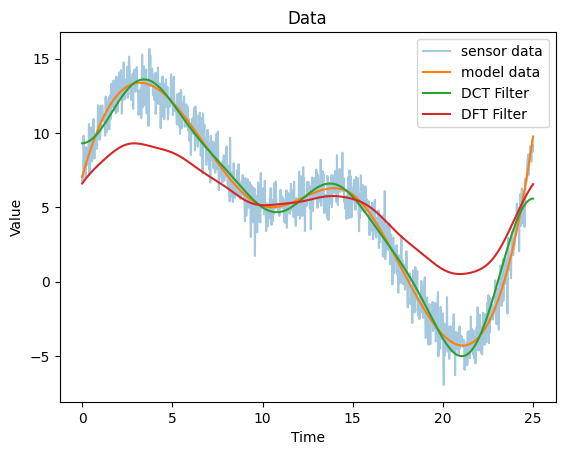

In [17]:
plt.ylabel('Value')
plt.xlabel('Time')
plt.title('Data')
plt.plot(xnew, measurement, label='sensor data', alpha = 0.4)
plt.plot(xnew, spl(xnew), label='model data')

DCT = idct(dct(measurement, norm='ortho')[:10], n=len(xnew), norm='ortho')
plt.plot(xnew, DCT, label='DCT Filter')

DFT = ifft(fft(measurement, norm='ortho')[:10], n=len(xnew), norm='ortho')
plt.plot(xnew, DFT, label='DFT Filter')

plt.legend()
plt.show()

# Task 3.2

In [49]:
from thinkdsp import read_wave, SinSignal, Wave
wave = read_wave('puppy_24.wav')
wave.make_audio()

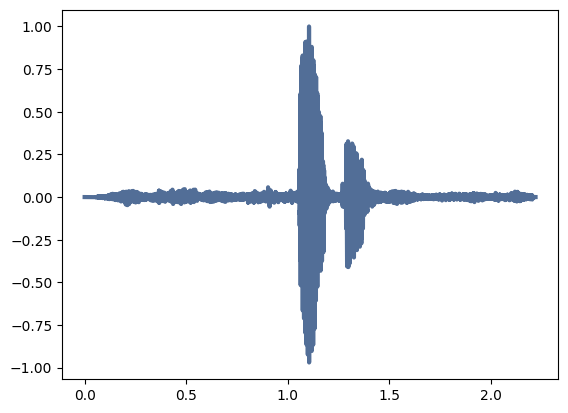

In [40]:
wave.plot()

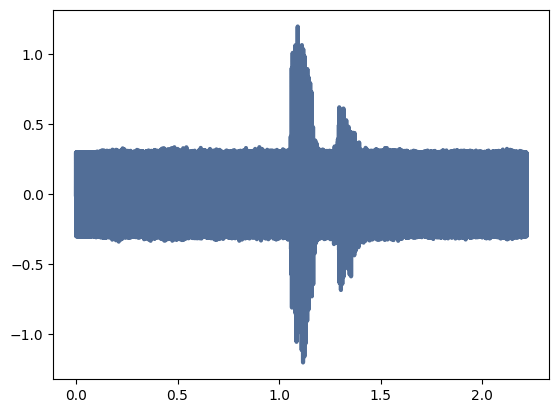

In [41]:
noize = SinSignal(freq=440, amp=0.3).make_wave(duration=wave.duration, framerate=wave.framerate)
corrupted = wave + noize
corrupted.plot()
corrupted.make_audio()

## Look on the spectrum

### Native spectrum of `Thinkdsp` 

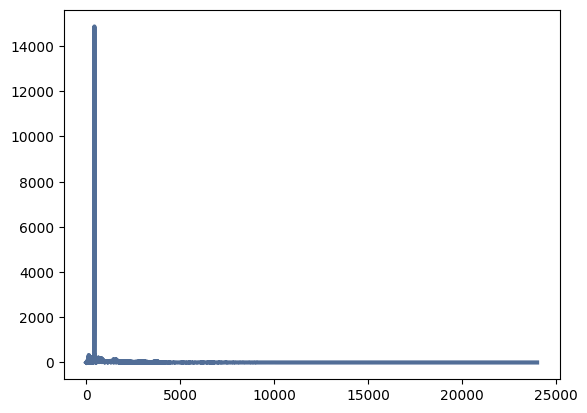

In [42]:
spectrum = corrupted.make_spectrum()
spectrum.plot()

### Spectrum from `scipy` 

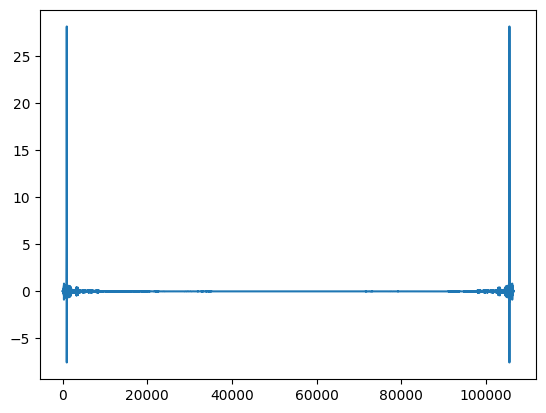

In [43]:
spectrum = fft(corrupted.ys, norm='ortho')
plt.plot(spectrum)

105520


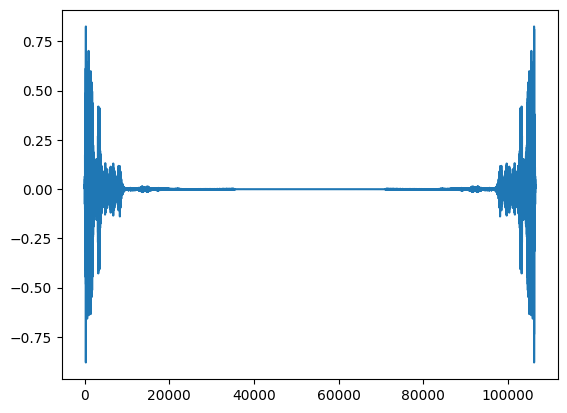

In [44]:
denoize_width = 10
freq = np.argmax(spectrum)
print(freq)
for i in range(denoize_width):
  spectrum[freq+i] = 0
  spectrum[freq-i] = 0
  spectrum[-freq-i] = 0
  spectrum[-freq+i] = 0
plt.plot(spectrum)

## Restore wave data from spectrum

In [51]:
ys = ifft(spectrum, norm='ortho')
restored = Wave(ys, framerate = wave.framerate)
restored.make_audio()